## The set up
Testing the model with some data from a panel of biological time course experiments.  The units of measurements are cell lines, which were either only stimulated to grow, or also treated with 1 of 4 drugs.  After the treatment, 32 outcomes were measured from each cell line at *unevenly* spaced time points for an hour.

The fitted model estimates outcome m, in cell c, treated with treatment i, at time t as $y_{c,i,t,m}= t_{c,\cdot,0,m} + \alpha_{c,i,t,m} + \tau_{c,i,t,m}$.  Where $\alpha$'s are the baseline responses without drugs, $\tau$'s represent the additive drug treatment effects, and the $t$'s are the cell's outcome levels at t=0. 

In the MeagerTesting code, $\alpha$s and $\tau$s are estimated using a single hierarchical Gaussian Process, while $t$s are Normal variables with a priors set through Empirical Bayes.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from MeagerTesting import GPCATE


## Load the data



In [2]:
dat= pd.read_csv('../data/median_phospho_data.csv')
col_filter= [i for i in dat.columns[3:] if i not in 'p.ERK p.PLCg2 p.HER2 p.S6 p.Akt.Ser473.']
row_filter= [(i!='full' and t not in (5.5, 23., 30.)) for i,t in dat[['treatment', 'time']].values.tolist()]

dat= dat[row_filter].set_index(['cell_line', 'treatment', 'time'])[col_filter]



In [3]:
dat.head()


b.CATENIN  cleavedCas   CyclinB     GAPDH       IdU  \
cell_line treatment time                                                        
184A1     EGF       0.0    1.242677    2.522134  1.693038  2.768195  5.048951   
                    7.0    1.121240    2.603469  1.693291  3.143739  5.004796   
                    9.0    1.304267    2.808688  1.848270  3.356148  4.966733   
                    13.0   1.218953    2.642353  1.755241  3.219771  4.982155   
                    17.0   1.291678    2.694526  1.819875  3.331797  4.984156   

                             Ki.67   p.4EBP1  p.AKT.Thr308.    p.AMPK  \
cell_line treatment time                                                
184A1     EGF       0.0   1.978325  1.848613       2.421126  3.105053   
                    7.0   2.148887  1.669925       2.530208  3.585454   
                    9.0   2.270448  1.882485       2.747399  3.746582   
                    13.0  2.130930  1.695485       2.596305  3.625195   
                    17.0  2.198302  1.715144       2.660943  3.624580   

                             p.BTK  ...     p.p53  p.p90RSK   p.PDPK1  \
cell_line treatment time            ...                                 
184A1     EGF       0.0   2.512008  ...  1.439909  2.643719  2.347183   
                    7.0   2.484960  ...  1.450442  3.098529  2.627577   
                    9.0   2.702564  ...  1.572184  3.353765  2.821235   
                    13.0  2.567510  ...  1.504860  3.182376  2.637170   
                    17.0  2.629539  ...  1.525213  3.242921  2.689866   

                              p.RB     p.S6K  p.SMAD23     p.SRC   p.STAT1  \
cell_line treatment time                                                     
184A1     EGF       0.0   4.559055  2.005021  2.275624  1.926817  2.256196   
                    7.0   4.199980  2.364732  2.230305  1.804816  2.317053   
                    9.0   4.431711  2.497817  2.457616  1.912574  2.436406   
                    13.0  4.344876  2.434111  2.329397  1.910402  2.441506   
                    17.0  4.482533  2.448674  2.411941  1.961523  2.525914   

                           p.STAT3   p.STAT5  
cell_line treatment time                      
184A1     EGF       0.0   1.898556  1.757215  
                    7.0   2.616184  2.316363  
                    9.0   2.977463  2.460209  
                    13.0  2.821463  2.504858  
                    17.0  2.798956  2.524875  

[5 rows x 32 columns]

In [4]:
T= list(zip(*dat.index.values))[2]
W= list(dat.index.codes[1])
X= list(dat.index.codes[0])
Y= dat.values


## Fit the A/B test model
X contains indicators of cell lines, W contains indicators of treatments, T contains time points of measurements, and rows in Y contain all measured outcomes for the combination of cell line, treatment, and time.

The output contains some sanity check metrics.  The r2 shows that most of the variation is explained by the cell-specific t=0 marker measurements, but the treatment time-courses meaningfully improve performance.


In [5]:
model= GPCATE(lr=.01, n_stp=2, n_iter= 2000, notebook=True)
model.fit( T, W, X, Y )



0		ELBO: 3.49E+05 - LLK: -2.79E+01 - r2: 0.862 - lr: 1.00E-02
100		ELBO: 2.48E+05 - LLK: -2.70E+01 - r2: 0.860 - lr: 1.00E-02
200		ELBO: 2.49E+05 - LLK: -2.72E+01 - r2: 0.849 - lr: 1.00E-02
300		ELBO: 2.37E+05 - LLK: -2.59E+01 - r2: 0.876 - lr: 1.00E-02
400		ELBO: 2.23E+05 - LLK: -2.50E+01 - r2: 0.888 - lr: 1.00E-02
500		ELBO: 2.15E+05 - LLK: -2.49E+01 - r2: 0.890 - lr: 1.00E-02
600		ELBO: 2.04E+05 - LLK: -2.42E+01 - r2: 0.888 - lr: 1.00E-02
700		ELBO: 2.01E+05 - LLK: -2.61E+01 - r2: 0.881 - lr: 1.00E-02
800		ELBO: 1.89E+05 - LLK: -2.49E+01 - r2: 0.915 - lr: 1.00E-02
900		ELBO: 1.97E+05 - LLK: -2.53E+01 - r2: 0.912 - lr: 1.00E-02
1000		ELBO: 1.93E+05 - LLK: -2.48E+01 - r2: 0.916 - lr: 1.00E-03
1100		ELBO: 1.78E+05 - LLK: -2.34E+01 - r2: 0.921 - lr: 1.00E-03
1200		ELBO: 1.76E+05 - LLK: -2.42E+01 - r2: 0.920 - lr: 1.00E-03
1300		ELBO: 1.64E+05 - LLK: -2.47E+01 - r2: 0.931 - lr: 1.00E-03
1400		ELBO: 1.65E+05 - LLK: -2.36E+01 - r2: 0.929 - lr: 1.00E-03
1500		ELBO: 1.60E+05 - LLK: -2.34E+01

## Get the credible intervals of the parameters

In [45]:
full= model.get_cred_int(param='ab')
incr= model.get_cred_int(param='incr')



## $\mu_{c,i,t,m} + \tau_{c,i,t,m}$ 
The normalized outcomes for all treatments, time points, and outcomes for a representative cell / unit of measurement

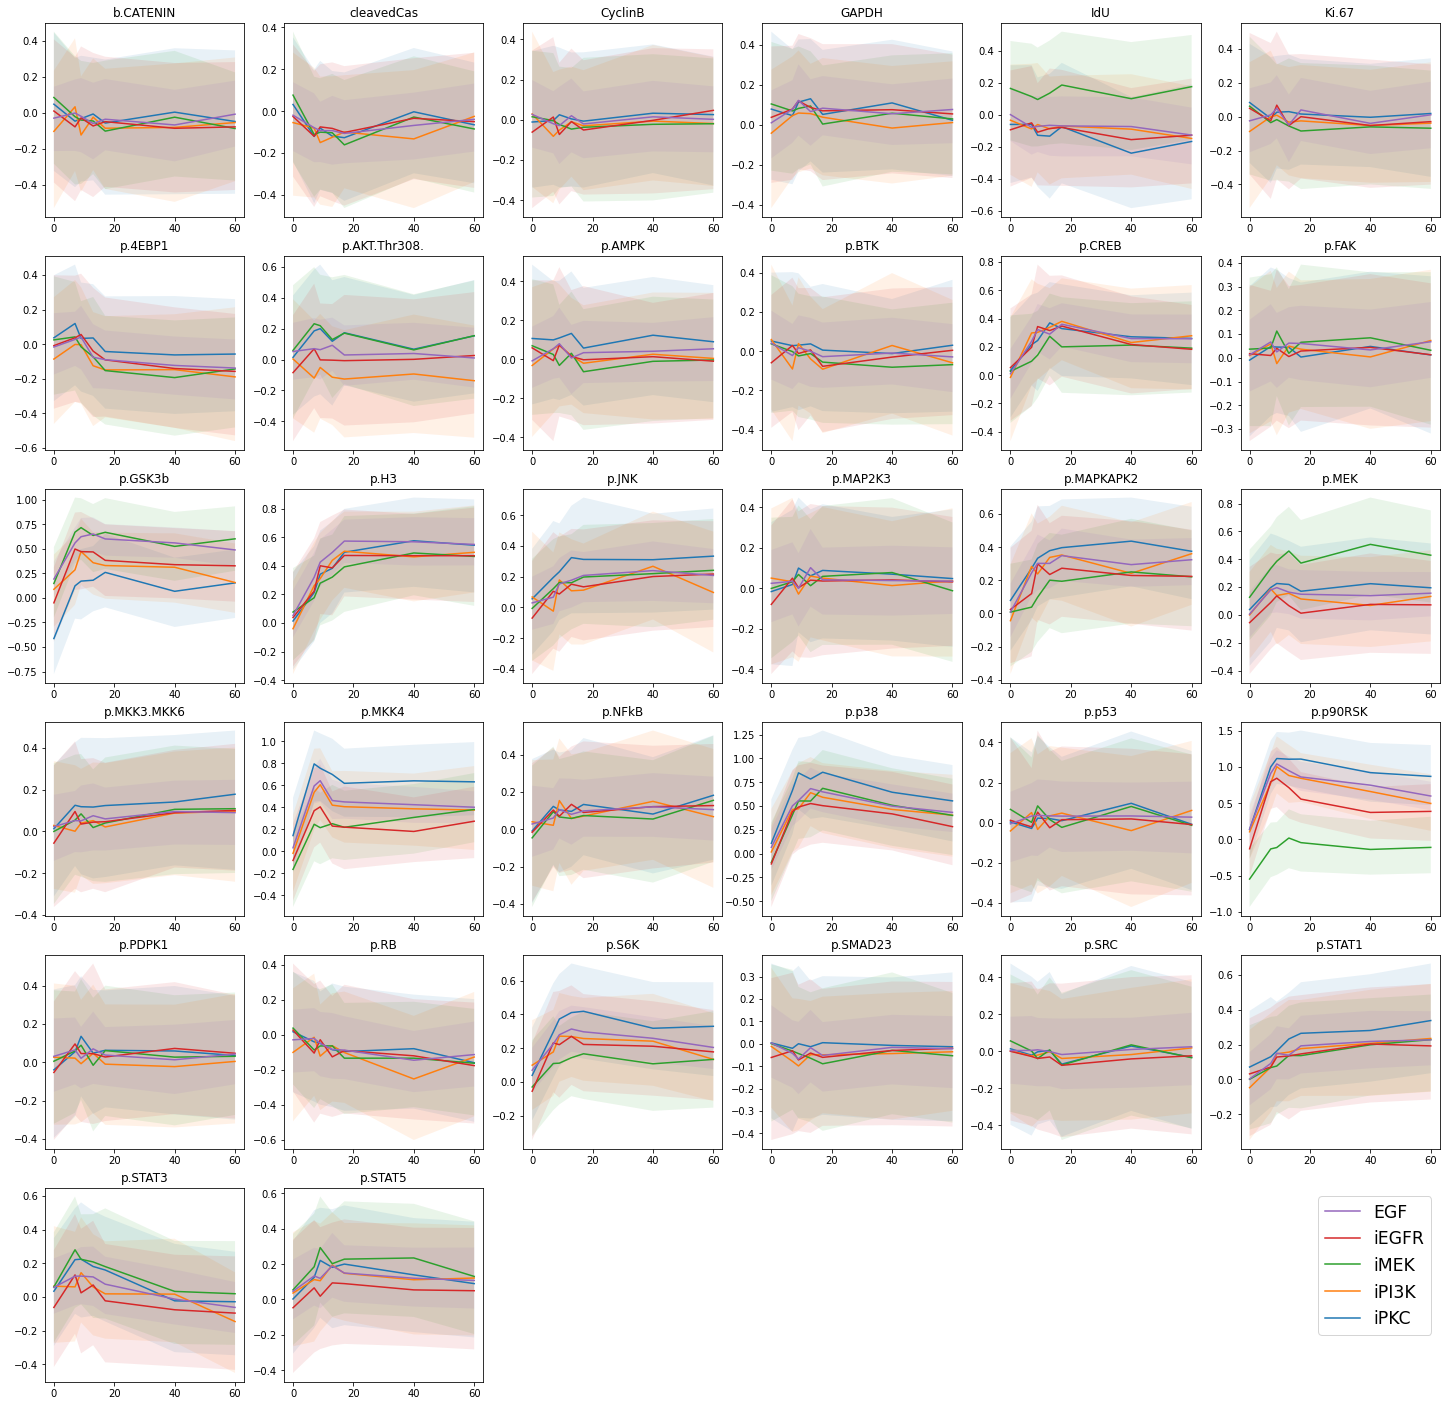

In [152]:
cll= 32

fig, axs = plt.subplots(nrows=6, ncols=6, constrained_layout=False, figsize= (25,25))

lines= []
for mrk, ax in enumerate(axs.flat):
    for trt in range(4,-1,-1):
        if mrk>=32:
            _= ax.set_axis_off()
        else:
            a= ax.plot(model.data['time_vals'].squeeze(), 
                       full[1,cll,trt,:,mrk])
            _= ax.fill_between(model.data['time_vals'].squeeze(), 
                               full[0,cll,trt,:,mrk], 
                               full[2,cll,trt,:,mrk], 
                               alpha=.1)
            _= ax.set_title(dat.columns[mrk])
            if mrk==31:
                lines.extend(a)

_= ax.legend(lines[::-1], dat.index.levels[1].tolist(), fontsize='xx-large')

    

## $\tau_{c,i,t,m}$
Just the additive treatment effects, for all treatments, time points, and outcomes of a representative unit of measurement

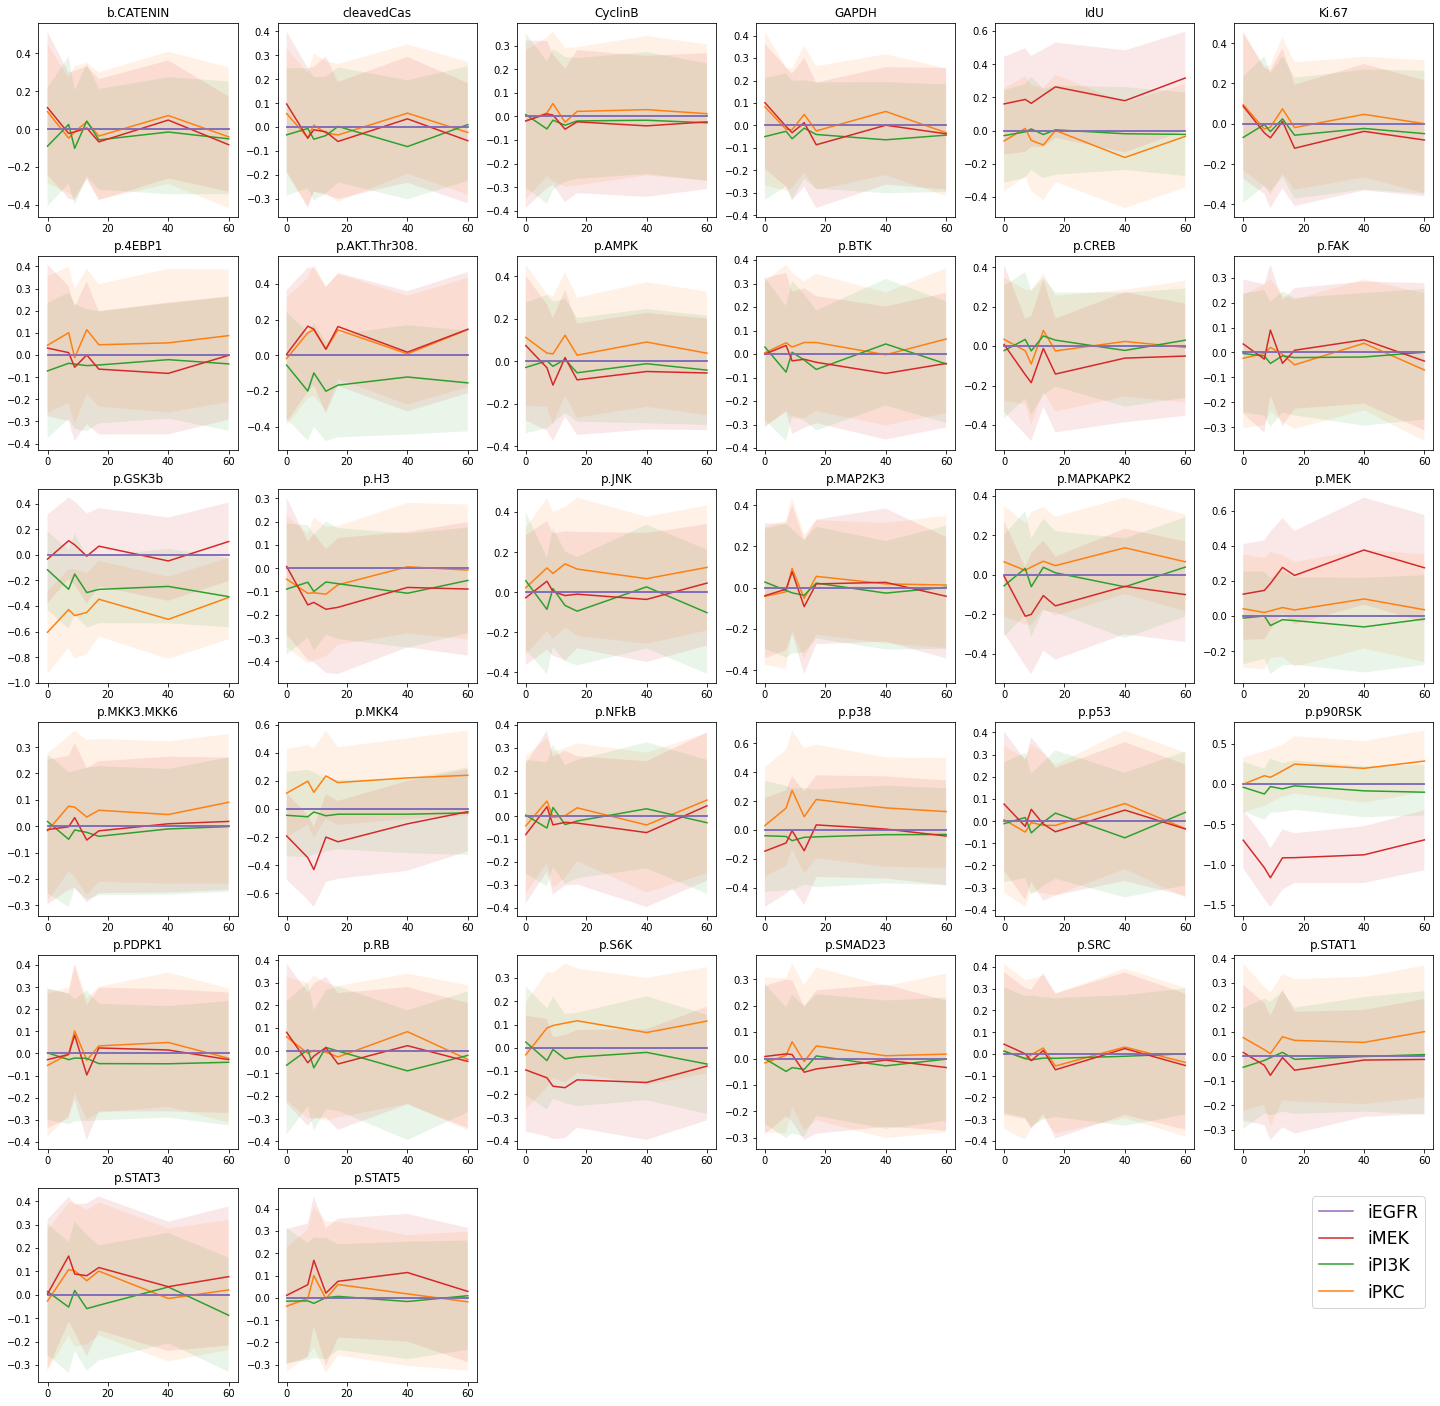

In [153]:
cll= 32

fig, axs = plt.subplots(nrows=6, ncols=6, constrained_layout=False, figsize= (25,25))

lines= []
for mrk, ax in enumerate(axs.flat):
    for trt in range(4,-1,-1):
        if mrk>=32:
            _= ax.set_axis_off()
        else:
            a= ax.plot(model.data['time_vals'].squeeze(), 
                       incr[1,cll,trt,:,mrk])
            _= ax.fill_between(model.data['time_vals'].squeeze(), 
                               incr[0,cll,trt,:,mrk], 
                               incr[2,cll,trt,:,mrk], 
                               alpha=.1)
            _= ax.set_title(dat.columns[mrk])
            if mrk==31:
                lines.extend(a)

_= ax.legend(lines[::-1], dat.index.levels[1].tolist()[1:], fontsize='xx-large')

    

## The main takeaway is that the treatments only had meaningful impacts on a few of the measured outcomes

This makes sense in the context of how the data was generated.  This data came from a biological experiment where cells were stimulated with growth encouraging signals (at t=0) while also being treated with drugs (at t=-15).  It turns out that the largest effects were in outcomes that were just downstream of the drug targets, while outcomes further away maintained the baseline response profiles, potentially because growth signals were transmitted through a compensating pathway.


![alt text](wiring_diagram.png)


## Model performance
For convenience, the model also provides two performance metrics that assess the extent to which conclusions from the model would generalize to new data.  

The first is a pooling factor metric, $\lambda$, from Gelman and Pardoe, which quantifies the extent that the hierarchical model relies on the population level.  For $\lambda >.5$, more than half of the signal comes from the global terms, which suggests that since the units in the sample mostly relied on the population level, new units would similarly largely be determined by the population level parameters.  In the example below, the high $\lambda$ values suggest most cells had similar time course profiles.

The other metric is an approximate leave one out posterior likelihood (PSIS-LOO from Vehtari et al), produced by reweighting the likelihoods of the data in posterior samples from the model.  This could be helpful for model comparison when evaluating model extensions.  The ks indicate the portion of data for which the necessary approximation assumptions hold.

In [112]:
lmbd, loo, ks= model.get_external_validity()


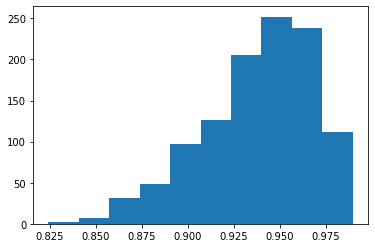

In [113]:
_= plt.hist(lmbd.squeeze())


In [164]:
loo

-12714.921